In [7]:
# Kennedi Todd
# August 2, 2024
# Chapter 6: Pre-modeling Algorithms
# PCA and k-Means Clustering

# libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# read data
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [8]:
# only keep continuous features
del df['Ad Topic Line']
del df['City']
del df['Country']
del df['Timestamp']
del df['Male']
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


In [12]:
# scale data
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

# assign algorithm
pca = PCA(n_components = 2)
pca.fit(scaled_data)
scaled_pca = pca.transform(scaled_data)

# compare two datasets
scaled_data.shape

(1000, 5)

In [13]:
scaled_pca.shape

(1000, 2)

Text(0, 0.5, 'PC 2')

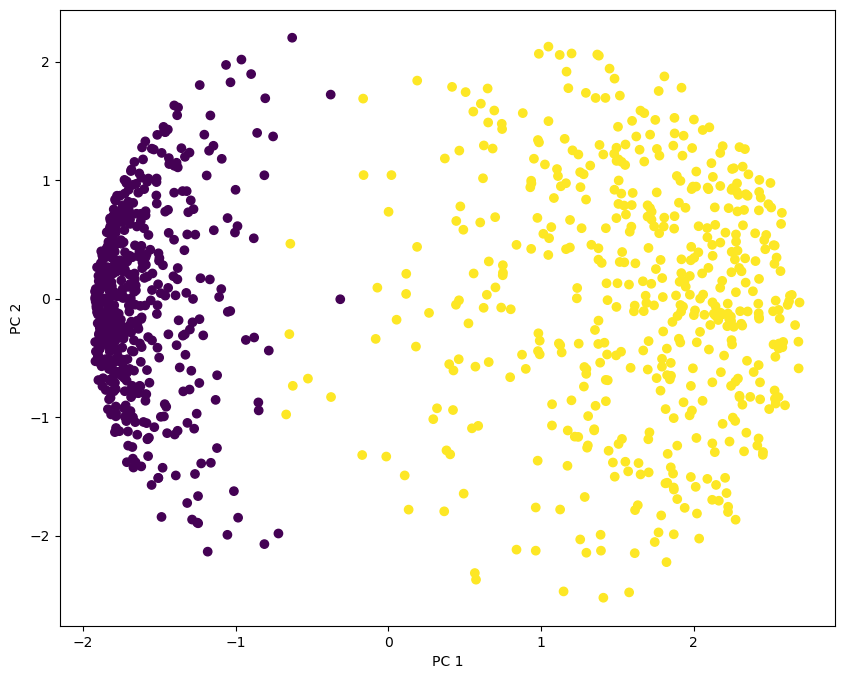

In [14]:
# plot PCA
# size
plt.figure(figsize = (10,8))
# axes
plt.scatter(scaled_pca[:, 0], scaled_pca[:, 1], c = df['Clicked on Ad'])
# labels
plt.xlabel('PC 1')
plt.ylabel('PC 2')

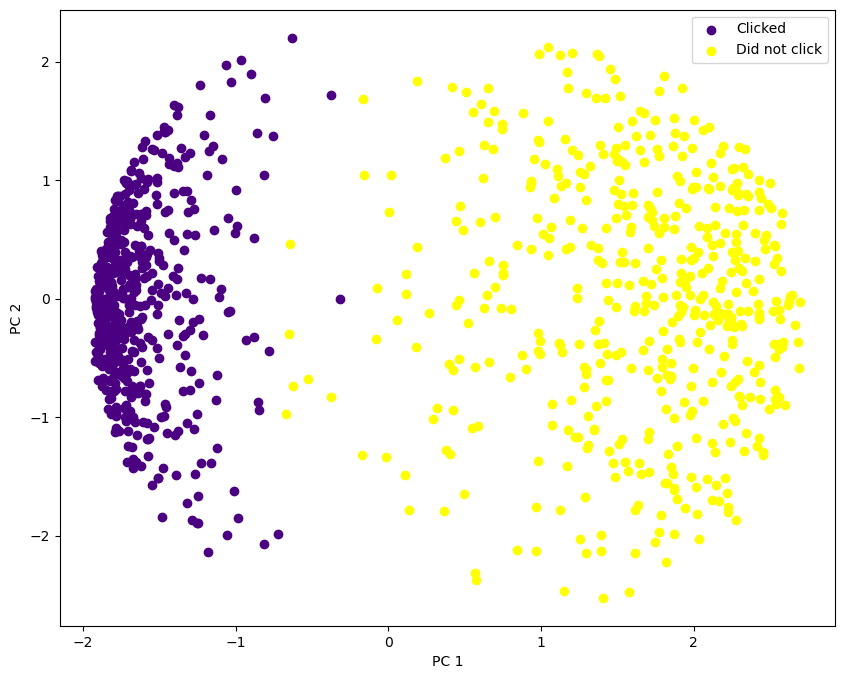

In [19]:
plt.figure(figsize = (10,8))

# Add indigo and yellow RGB colors
legend = df['Clicked on Ad']
colors = {0: '#4B0082', 1: '#FFFF00'}
labels = {0: 'Clicked', 1: 'Did not click'}
for t in np.unique(legend):
    ix = np.where(legend == t)
    plt.scatter(scaled_pca[ix, 0], 
                scaled_pca[ix, 1],
                c = colors[t],
                label = labels[t])

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()